This code is for an analysis of the ETC 2015 tournament, and particularly a response to http://www.belloflostsouls.net/2015/08/anatomy-of-a-40k-disaster-usa-vs-europe-etc-analysis.html. The text of the review itself is at: http://www.variancehammer.com. Note that because this analysis uses random numbers, any results you obtain may differ from those on the blog posting due to random chance.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import random as rand
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [16]:
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

First, lets look at a somewhat intuitive, albeit simplistic, way of modeling the results from the ETC - pooling all the point results together, drawing one for each round, and representing this as your "final score". First, that means...pooling all the ETC results.

In [36]:
RealETC = np.array([59,101,99,61,123,37,43,105,103,42,91,62,94,47,99,61,104,56,109,51,96,64,133,27,28,132,132,28,41,119,94,66,138,22,112,58,75,85,76,84,106,54,104,56,58,102,70,90,79,81,69,91,49,111,52,108,85,75,40,120,61,99,61,99,98,79,112,48,85,75,71,89,75,85,53,104,49,111,104,56,60,100,91,69,127,33,65,95,86,74,62,98,85,75,61,99,60,100,100,60,79,81,107,53,113,47,121,39,93,67,120,40,48,107,42,113,104,56,79,81,80,80,63,97,49,111,111,49,83,77,115,45,98,82,71,89,119,36,77,83,107,53,87,73,62,92,100,60,94,66,93,67,70,89,106,54,47,113,109,51,60,100,41,119,125,35,0,160])
ETCWin = np.array([101,99,123,105,103,91,94,99,104,109,96,133,132,132,199,94,138,112,85,84,106,104,102,90,81,91,111,108,85,120,99,99,81,112,85,89,85,104,111,104,100,91,127,95,86,98,85,99,100,100,81,107,113,121,93,120,107,113,104,81,80,97,111,111,83,115,98,89,119,83,107,87,82,100,94,93,89,106,113,109,100,119,125,160])
ETCLoss = np.array([53,73,92,60,66,67,89,54,47,51,60,41,35,0,48,42,56,79,80,63,49,49,77,45,82,71,36,77,33,65,74,62,75,61,60,60,79,53,47,39,67,40,75,40,61,61,79,48,75,71,75,53,49,56,60,69,41,66,22,58,75,76,54,56,58,70,79,69,49,52,59,61,37,43,42,62,47,61,56,51,64,27,28])

We then randomly draw six samples, without replacement, from this bag of "potential game results" to simulate a single tournament result, and repeat this many times to obtain the distribution of potential results.

In [35]:
n_draws = 10000
ETCReachin = np.empty([n_draws,1])
for i in range(n_draws):
    ETCReachin[i][0] = np.sum(np.random.choice(RealETC,6,replace=True))
print np.mean(ETCReachin)
print np.mean(RealETC)
print np.max(ETCReachin)

478.0558
79.8154761905
722.0


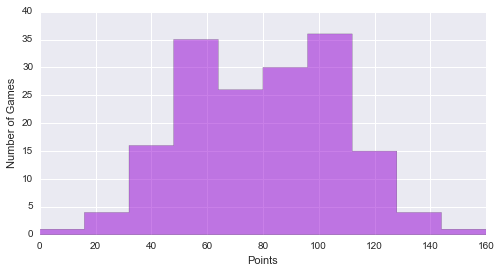

In [34]:
plt.hist(RealETC,alpha=0.50,color="DarkViolet",histtype="stepfilled")
plt.xlabel("Points")
plt.ylabel("Number of Games")

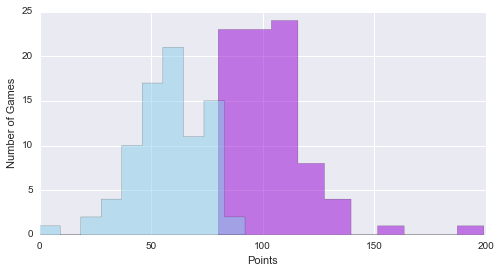

In [37]:
plt.hist(ETCWin,alpha=0.50,color="DarkViolet",histtype="stepfilled")
plt.hist(ETCLoss,alpha=0.50,color="SkyBlue",histtype="stepfilled")
plt.xlabel("Points")
plt.ylabel("Number of Games")

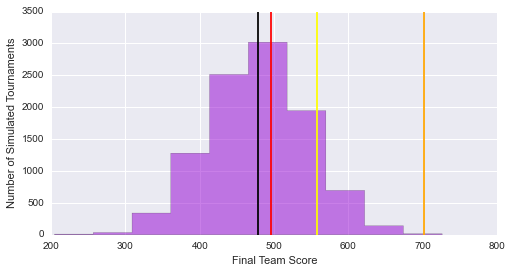

In [30]:
plt.hist(ETCReachin[:,0],alpha=0.50,color="DarkViolet",histtype="stepfilled")
plt.axvline(x=496,ymin=0,ymax=3000,color="Red") #vertical line at USA result
plt.axvline(x=558,ymin=0,ymax=3000,color="Yellow") #vertical line at Sweden result
plt.axvline(x=701,ymin=0,ymax=3000,color="Orange") #vertical line at Germany result
plt.axvline(x=np.mean(ETCReachin),ymin=0,ymax=3000,color="Black")

plt.xlabel("Final Team Score")
plt.ylabel("Number of Simulated Tournaments")

In [50]:
USA = np.array([99,184,283,378,423,496])
Wales = np.array([132,226,301,366,445,537])
axis = np.array([1,2,3,4,5,6])

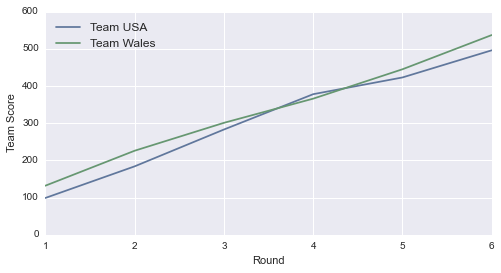

In [52]:
plt.figure()
a = plt.plot(axis,USA)
b = plt.plot(axis,Wales)
plt.legend(["Team USA","Team Wales"],loc=2,fontsize="large")
plt.xlabel("Round")
plt.ylabel("Team Score")